# Wine Dataset for Clustering
## Cluster wines based on their chemical constituents

This dataset is adapted from the Wine Data Set from https://archive.ics.uci.edu/ml/datasets/wine by removing the information about the types of wine for unsupervised learning.

The following descriptions are adapted from the UCI webpage:

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The attributes are:

* Alcohol
* Malic acid
* Ash
* Alcalinity of ash
* Magnesium
* Total phenols
* Flavanoids
* Nonflavanoid phenols
* Proanthocyanins
* Color intensity
* Hue
* OD280/OD315 of diluted wines
* Proline


# Project-3

The project is an unsupervised classification problem.

Feature scaling: MinMaxScaler and StandardScaler
Feature dimensionality reduction: PCA and TSNE
Model: KMeans,  SpectralClustering and GMM


# Load Dataset

In [1]:
import pandas as pd
data = pd.read_csv('wine/wine-clustering.csv')
data.shape

(178, 13)

# Exploratory Data Analysis(EDA)

In [2]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


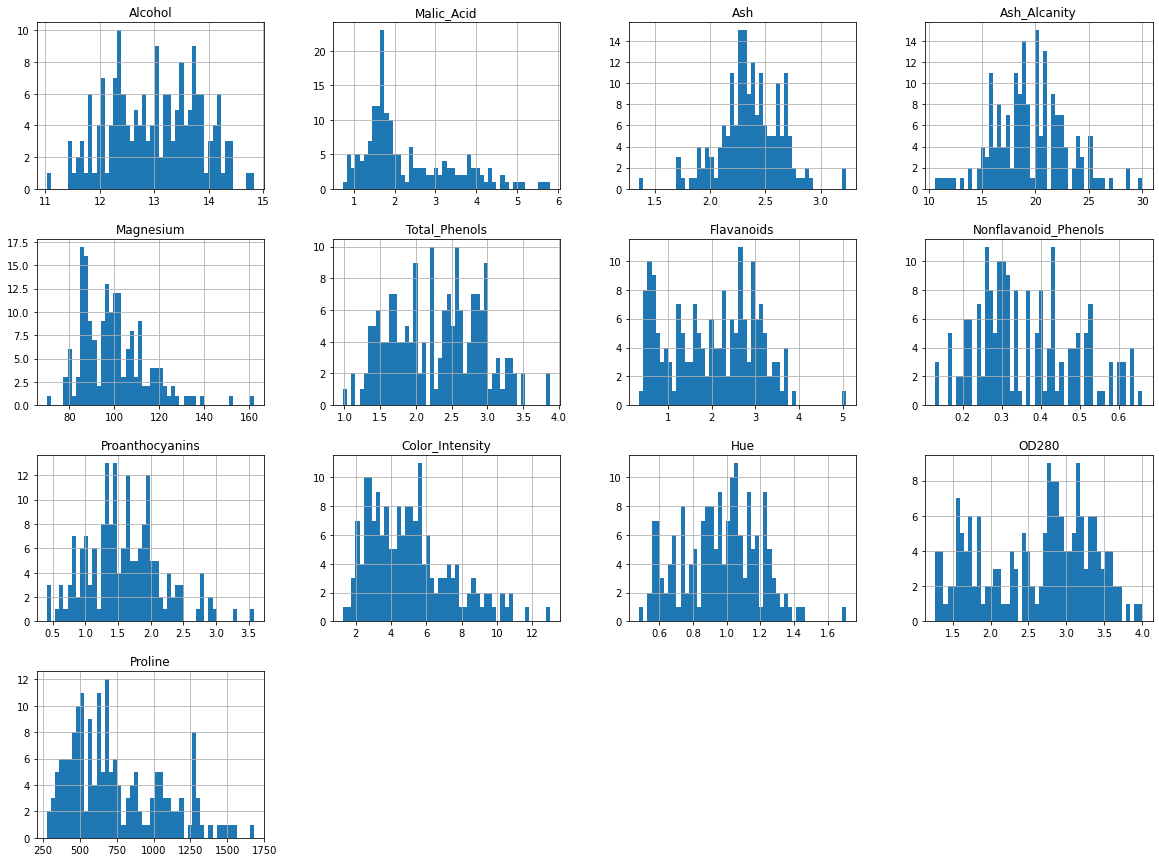

In [4]:
#see data distribution
import matplotlib.pyplot as plt

data.hist(bins=50, figsize=(20,15))
plt.show()


In [5]:
#check NaN
data.isnull().sum().sum()

0

# find the number of clusters 
checking Kmeans inertia and Silhouette Score

## preprocess dataset
1. feature scaling: MinMaxScaler and StandardScaler 
2. feature dimensionality reduction: PCA(n_components=0.99)

### feature scaling using StandardScaler and MinMaxScaler

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

mm_scaler = MinMaxScaler()
mm_scaler.fit(data)
data_mm = pd.DataFrame(mm_scaler.transform(data))

st_scaler = StandardScaler()
st_scaler.fit(data)
data_st = pd.DataFrame(st_scaler.transform(data))


In [7]:
data_mm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


In [8]:
data_st.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


### Reduce feature dimension

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.99)
pca.fit(data_mm)
reduced = pca.transform(data_mm)


In [10]:
print(pca.n_components_ )

12


In [11]:
pca.get_params

<bound method BaseEstimator.get_params of PCA(n_components=0.99)>

In [12]:
pca.explained_variance_

array([0.2200922 , 0.10246084, 0.04624247, 0.04011226, 0.03005877,
       0.02516286, 0.01978926, 0.01301012, 0.01228411, 0.01215769,
       0.0074605 , 0.00687688])

In [13]:
pca.explained_variance_ratio_

array([0.40749485, 0.18970352, 0.08561671, 0.07426678, 0.05565301,
       0.04658837, 0.03663929, 0.02408789, 0.02274371, 0.02250965,
       0.01381292, 0.01273236])

In [14]:
pca.n_samples_

178

In [15]:
pca.singular_values_

array([6.24149973, 4.25858763, 2.86092949, 2.66455806, 2.30659969,
       2.11040916, 1.87154992, 1.51749512, 1.47454661, 1.46693958,
       1.14913412, 1.10327134])

In [16]:
#pca.get_covariance()

### find the number of clusters



In [17]:
from tqdm import tqdm
import sklearn.cluster as cluster
X=reduced
inertia = []
for i in tqdm(range(2,10)):
    kmeans = cluster.KMeans(n_clusters=i,
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

100%|██████████| 8/8 [00:00<00:00, 20.54it/s]


In [18]:
from sklearn.metrics import silhouette_score

silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = cluster.KMeans(n_clusters=i,
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(X)
    silhouette[i] = silhouette_score(X, kmeans.labels_, metric='euclidean')

100%|██████████| 8/8 [00:00<00:00, 18.82it/s]


In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

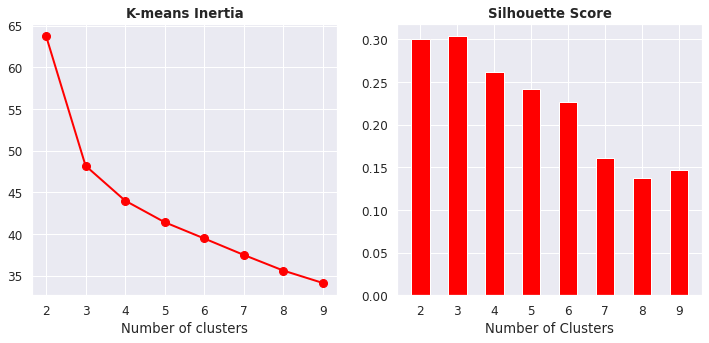

In [20]:
sns.set(font_scale=1.1, rc={'figure.figsize':(12,5)})

plt.subplot(1, 2, 1)

plt.plot(range(2,len(inertia)+2), inertia, marker='o',lw=2,ms=8,color='red')
plt.xlabel('Number of clusters')
plt.title('K-means Inertia',fontweight='bold')
plt.grid(True)

plt.subplot(1, 2, 2)

plt.bar(range(len(silhouette)), list(silhouette.values()), align='center',color= 'red',width=0.5)
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.grid()
plt.title('Silhouette Score', fontweight='bold')
plt.xlabel('Number of Clusters')
plt.grid(True)

plt.show()

The elbow point in the inertia graph shows three clusters.

# Models 

## Trial-1: KMeans
feature dimension reduction: PCA(n_components=0.99)
feature scaling: MinMaxscaler
model: KMeans

In [21]:
X=reduced

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

centers = kmeans.cluster_centers_
y_kmeans = kmeans.predict(X)

In [22]:
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [23]:
print(kmeans.cluster_centers_.shape)
kmeans.cluster_centers_

(3, 12)


array([[-0.02833766,  0.36929543,  0.02608697,  0.01894259,  0.01048201,
         0.03626576, -0.00436431,  0.01133434, -0.00175541, -0.00824345,
         0.0063946 ,  0.00323421],
       [ 0.58281495, -0.19899808, -0.02675917,  0.00785434,  0.01940574,
         0.01025053, -0.00666341, -0.00760608,  0.00968502, -0.00150941,
        -0.0023182 ,  0.00521744],
       [-0.48666778, -0.20524124, -0.00325383, -0.02651668, -0.02800453,
        -0.04652904,  0.01040615, -0.00497271, -0.00676065,  0.00984992,
        -0.00455208, -0.00795897]])

In [24]:
print(kmeans.cluster_centers_)
print(kmeans.labels_)
print(kmeans.inertia_)
print(kmeans.n_iter_)

[[-0.02833766  0.36929543  0.02608697  0.01894259  0.01048201  0.03626576
  -0.00436431  0.01133434 -0.00175541 -0.00824345  0.0063946   0.00323421]
 [ 0.58281495 -0.19899808 -0.02675917  0.00785434  0.01940574  0.01025053
  -0.00666341 -0.00760608  0.00968502 -0.00150941 -0.0023182   0.00521744]
 [-0.48666778 -0.20524124 -0.00325383 -0.02651668 -0.02800453 -0.04652904
   0.01040615 -0.00497271 -0.00676065  0.00984992 -0.00455208 -0.00795897]]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 1 0 0 0 0 0 0 1 0 1 0 0 2
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
48.181799785098605
4


In [25]:
centers

array([[-0.02833766,  0.36929543,  0.02608697,  0.01894259,  0.01048201,
         0.03626576, -0.00436431,  0.01133434, -0.00175541, -0.00824345,
         0.0063946 ,  0.00323421],
       [ 0.58281495, -0.19899808, -0.02675917,  0.00785434,  0.01940574,
         0.01025053, -0.00666341, -0.00760608,  0.00968502, -0.00150941,
        -0.0023182 ,  0.00521744],
       [-0.48666778, -0.20524124, -0.00325383, -0.02651668, -0.02800453,
        -0.04652904,  0.01040615, -0.00497271, -0.00676065,  0.00984992,
        -0.00455208, -0.00795897]])

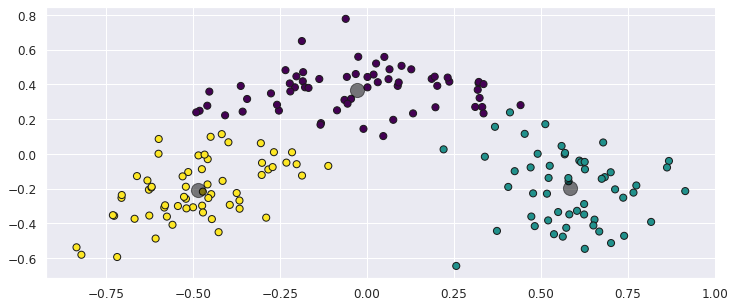

In [26]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', edgecolor='k')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Trial-2
feature scaling: MinMaxScaler
feature dimension reduction: PCA(n_components=2)
model: KMeans with 3 n_clusters

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(data_mm)
reduced = pca.transform(data_mm)
print(pca.n_components_ )

2


In [28]:
X=reduced

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

centers = kmeans.cluster_centers_
y_kmeans = kmeans.predict(X)

In [29]:
print(kmeans.cluster_centers_)
print(kmeans.labels_)
print(kmeans.inertia_)
print(kmeans.n_iter_)

[[ 0.01701227  0.36612572]
 [ 0.59750634 -0.21895939]
 [-0.48503975 -0.17742871]]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 1 0 0 0 0 2 0 0 0 0 2 0 2
 2 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
10.771762804100014
4


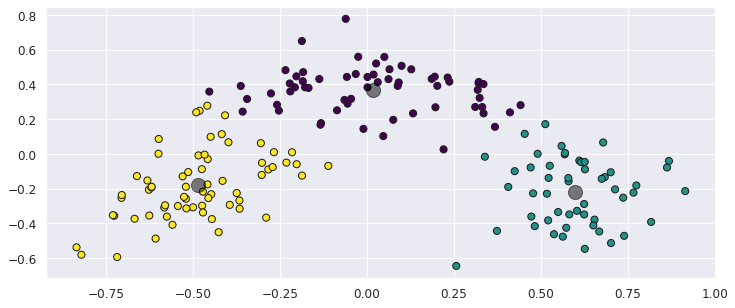

In [30]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', edgecolor='k')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Trial-2-1

Validate KMeans result by checking kmeans.cluster_centers_

In [31]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

y=np.zeros(X.shape[0])
for ii in [0.05, 0.1, 0.2, 0.3, 0.5]:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=ii, random_state=4)
    #random.shuffle(trainX)
    #cnt = int(trainX.shape[0] * ii)
    print("x_train.shape =", X_train.shape)
    kmeans = KMeans(n_clusters=3)
    #train = trainX[0:cnt,:]
    #kmeans.fit(trainX[train])
    kmeans.fit(X_train)
    centers = kmeans.cluster_centers_
    print(centers)
    


x_train.shape = (169, 2)
[[-0.48402789 -0.17901183]
 [ 0.59509925 -0.2244944 ]
 [ 0.02144836  0.36804392]]
x_train.shape = (160, 2)
[[-0.48352702 -0.16815111]
 [ 0.59396892 -0.22532429]
 [ 0.01339533  0.36865025]]
x_train.shape = (142, 2)
[[ 0.00765661  0.36707503]
 [-0.48052825 -0.1640494 ]
 [ 0.5968309  -0.23066632]]
x_train.shape = (124, 2)
[[-0.4864825  -0.15941194]
 [ 0.60978903 -0.23951205]
 [ 0.01249861  0.3576042 ]]
x_train.shape = (89, 2)
[[-0.47581428 -0.14074274]
 [ 0.6500926  -0.26651877]
 [ 0.04650833  0.34657954]]


## Trial-3
feature scaling: MinMaxScaler
feature SpectralClustering reduction: PCA(n_components=2)
model: SpectralClustering

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(data_mm)
reduced = pca.transform(data_mm)
print(pca.n_components_ )

2


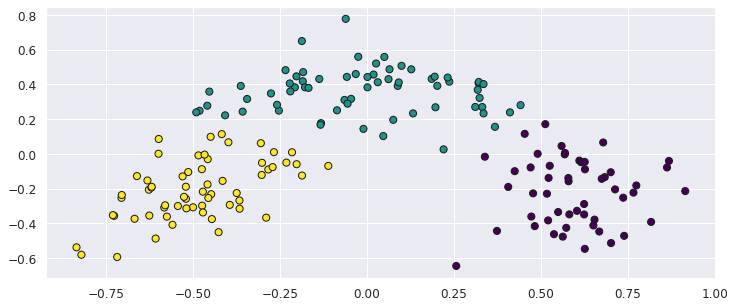

In [33]:
X=reduced
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=3, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis', edgecolor='k');

In [34]:
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [35]:
model.get_params()

{'affinity': 'nearest_neighbors',
 'assign_labels': 'kmeans',
 'coef0': 1,
 'degree': 3,
 'eigen_solver': None,
 'eigen_tol': 0.0,
 'gamma': 1.0,
 'kernel_params': None,
 'n_clusters': 3,
 'n_components': None,
 'n_init': 10,
 'n_jobs': None,
 'n_neighbors': 10,
 'random_state': None}

In [36]:
model.affinity_matrix_

<178x178 sparse matrix of type '<class 'numpy.float64'>'
	with 2172 stored elements in Compressed Sparse Row format>

In [37]:
print(model.affinity_matrix_.shape)
print(model.affinity_matrix_)
#model.labels_

(178, 178)
  (0, 20)	0.5
  (0, 14)	0.5
  (0, 13)	0.5
  (0, 58)	1.0
  (0, 50)	1.0
  (0, 51)	1.0
  (0, 10)	1.0
  (0, 47)	1.0
  (0, 52)	1.0
  (0, 9)	1.0
  (0, 42)	1.0
  (0, 0)	1.0
  (1, 73)	0.5
  (1, 23)	1.0
  (1, 40)	0.5
  (1, 22)	1.0
  (1, 95)	1.0
  (1, 24)	1.0
  (1, 29)	1.0
  (1, 28)	1.0
  (1, 35)	1.0
  (1, 44)	1.0
  (1, 1)	1.0
  (2, 50)	0.5
  (2, 47)	0.5
  :	:
  (176, 168)	0.5
  (176, 159)	0.5
  (176, 158)	0.5
  (176, 153)	0.5
  (176, 148)	0.5
  (176, 149)	1.0
  (176, 151)	1.0
  (176, 164)	1.0
  (176, 169)	1.0
  (176, 156)	1.0
  (176, 174)	1.0
  (176, 150)	1.0
  (176, 166)	1.0
  (176, 172)	1.0
  (176, 176)	1.0
  (177, 172)	0.5
  (177, 155)	1.0
  (177, 176)	0.5
  (177, 166)	0.5
  (177, 149)	0.5
  (177, 156)	1.0
  (177, 175)	1.0
  (177, 153)	1.0
  (177, 173)	1.0
  (177, 177)	1.0


## Trial-4
1.feature scaling: MinMaxScaler
2.feature dimension reduction: TSNE
3.model: KMeans with 3 clusters

In [38]:
reduced = data_mm

In [39]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
X_proj = tsne.fit_transform(reduced)
print("digits_proj: ", X_proj.shape)
# Compute the clusters
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X_proj)


digits_proj:  (178, 2)


In [40]:
print(clusters)
print(clusters.shape)
print("\n")
print(kmeans.cluster_centers_)
print(kmeans.labels_)
print(kmeans.inertia_)
print(kmeans.n_iter_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 2 2 2 2 2 2 1 2 1 0 2 0
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 2 0 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
(178,)


[[ -6.468292   -14.179025  ]
 [  8.516861     4.94728   ]
 [  0.48413423  -4.445868  ]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 2 2 2 2 2 2 1 2 1 0 2 0
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 2 0 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
1919.035888671875
5


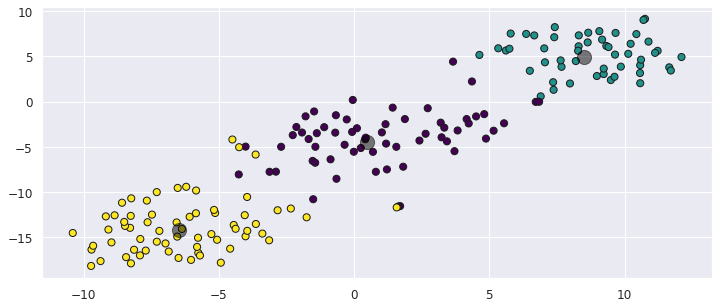

In [41]:
X=X_proj
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', edgecolor='k')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Trial-5
1.feature scaling: StandardScaler
2.feature dimension reduction: PCS with n_compoents=2
3.model: KMeans with 3 clusters

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(data_st)
reduced = pca.transform(data_st)
print(pca.n_components_ )

2


In [43]:
# Compute the clusters
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(reduced)

In [44]:
print(clusters)
print(clusters.shape)
print("\n")
print(kmeans.cluster_centers_)
print(kmeans.labels_)
print(kmeans.inertia_)
print(kmeans.n_iter_)



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
(178,)


[[ 2.28888211 -0.95994724]
 [-2.74392982 -1.2141906 ]
 [-0.07601834  1.73606061]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
259.8077220498024
3


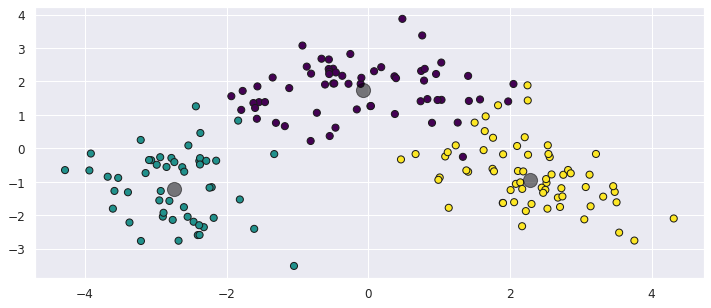

In [45]:
X=reduced
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', edgecolor='k')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Trial-6
feature dimension reduction: PCA(0.99, whiten=False)
feature scaling: MinMaxscaler
model: GMM

In [46]:
data_mm.shape

(178, 13)

In [47]:
from sklearn.decomposition import PCA

pca = PCA(0.99, whiten=False)
data = pca.fit_transform(data_mm)
#print(data.mean(axis=0))
#print(data.std(axis=0))

In [48]:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(3, covariance_type='full', random_state=0)
gmm.fit(data)
print(gmm.converged_)

True


#plot_gmm(gmm, data, label=False)
plot_gmm(gmm, data)

In [49]:
data.shape

(178, 12)

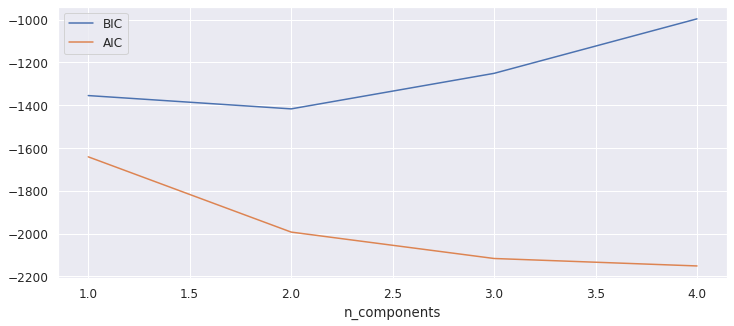

In [50]:
n_components = np.arange(1, 5)
models = [GMM(n, covariance_type='full', random_state=0).fit(data)
          for n in n_components]

plt.plot(n_components, [m.bic(data) for m in models], label='BIC')
plt.plot(n_components, [m.aic(data) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [51]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=0.99, whiten=True, svd_solver='randomized', random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

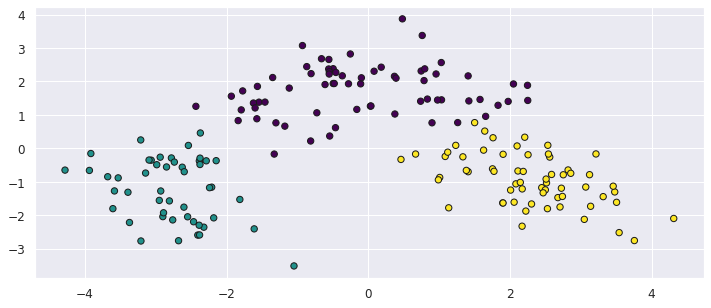

In [52]:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=3).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', edgecolor='k');

In [53]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.    0.    1.   ]
 [0.04  0.    0.96 ]
 [0.    0.    1.   ]
 [0.    0.    1.   ]
 [0.004 0.    0.996]]
